In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
data = pd.read_csv("housing.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02/05/2014 0:00,313000.0,3,1.50,1340.0,NaN,1.5,0,0,3,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02/05/2014 0:00,2384000.0,5,2.50,3650.0,NaN,2.0,0,4,5,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,02/05/2014 0:00,342000.0,3,2.00,1930.0,NaN,1.0,0,0,4,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02/05/2014 0:00,420000.0,3,2.25,2000.0,NaN,1.0,0,0,4,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02/05/2014 0:00,550000.0,4,2.50,1940.0,NaN,1.0,0,0,4,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
print("Shape:", data.shape)
data.info()
data.describe()
print("Columns:", data.columns.tolist())

Shape: (4600, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4560 non-null   float64
 5   sqft_lot       4586 non-null   float64
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4577 non-null   float64
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4543 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   obj

In [4]:
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())

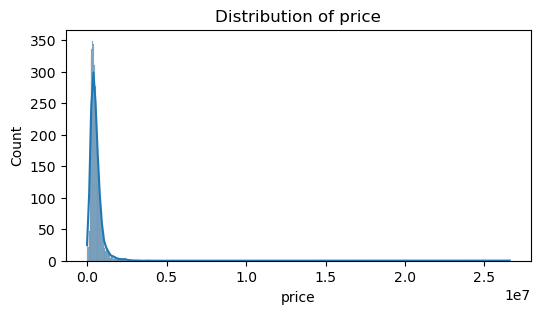

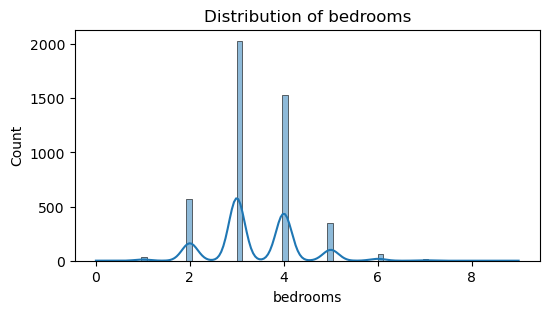

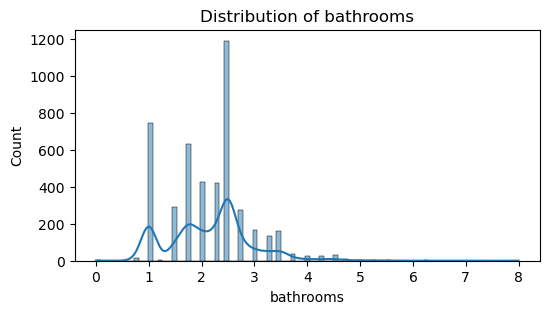

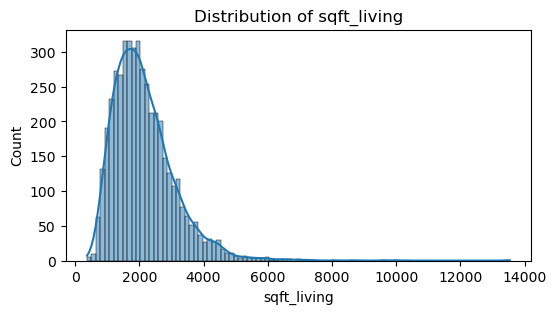

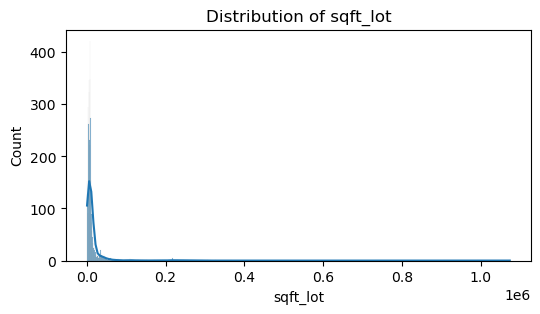

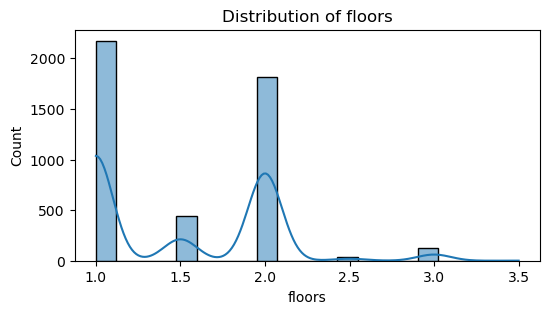

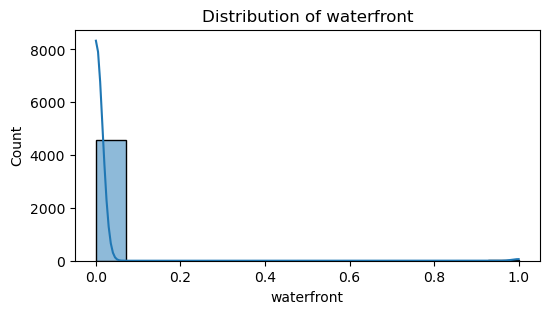

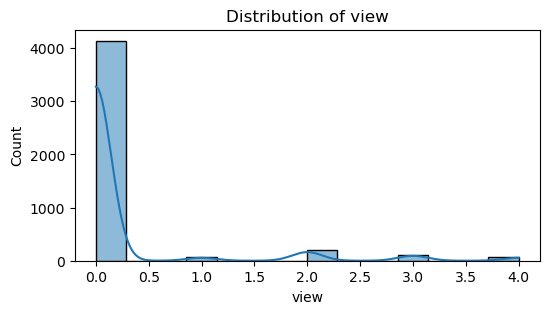

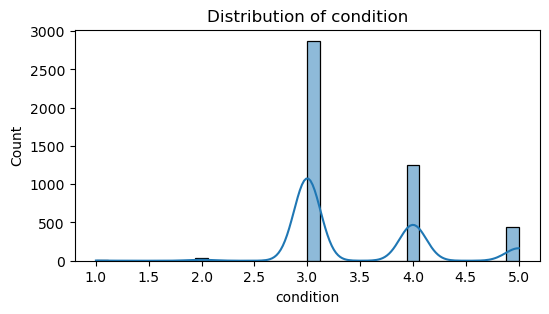

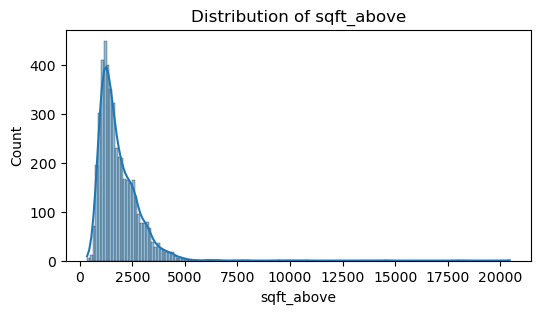

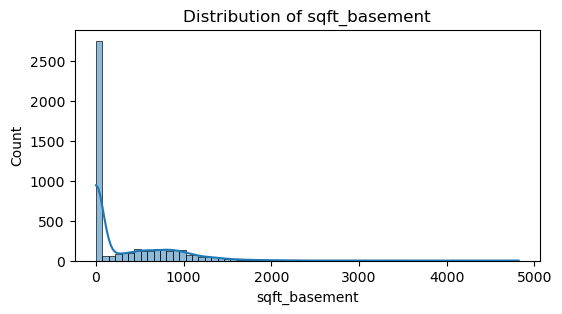

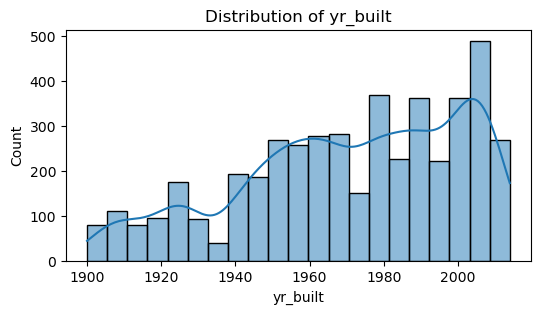

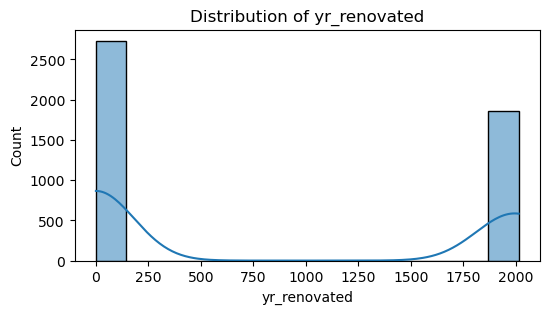

In [5]:
num_cols = data.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


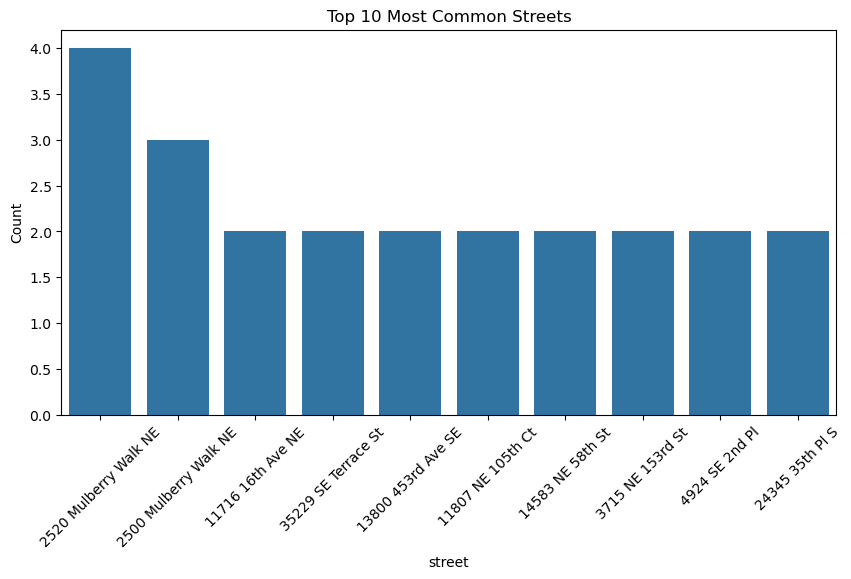

In [8]:
plt.figure(figsize=(10,5))
top_streets = data['street'].value_counts().head(10)
sns.barplot(x=top_streets.index, y=top_streets.values)
plt.xticks(rotation=45)
plt.title("Top 10 Most Common Streets")
plt.ylabel("Count")
plt.show()


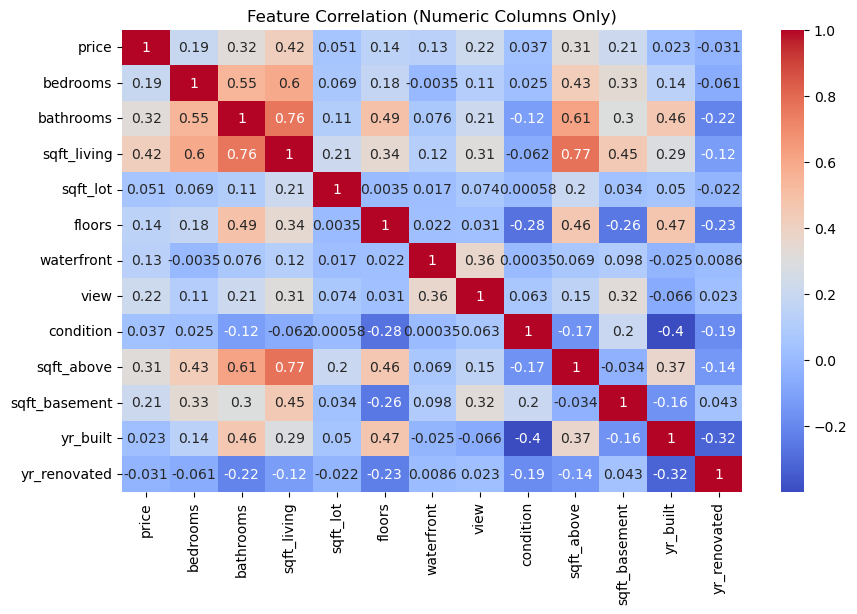

In [9]:
plt.figure(figsize=(10,6))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation (Numeric Columns Only)")
plt.show()